# Comparison Notebook

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(['blue', 'red'])

## Comparison of different types of normalization for ZFNet
- Local Response Normalization (LRN)
    + used `torch.nn.LocalResponseNorm(size=5,alpha=10e-4,beta=0.75,k=2.0)` 
    + same parameters from the [AlexNet](https://dl.acm.org/doi/10.1145/3065386) Paper
- Local Contrast Normalization (LCN)
    + described in the [ZFNet](https://link.springer.com/chapter/10.1007/978-3-319-10590-1_53) paper
    + code modified from [dibyadas's GitHub repository](https://github.com/dibyadas/Visualize-Normalizations/blob/master/LocalContrastNorm.ipynb) due to no `torch.nn` implementation
- [Batch Normalization](https://dl.acm.org/doi/10.5555/3045118.3045167) (BN) seems to work best for controlling the activation outputs. This makes sense because BN is what is typically used nowadays instead of the other methods. However, BN was invented after ZFNet came out, that is why it was not used in the model 
- The Local Contrast Normalization doesn't work as well even though it is one of the improvements of ZFnet over AlexNet.
    + This may be due to using a custom implementation of LCN that may not be optimized.
    + It also takes longer than other methods. This is characteristic of LCN and is typically why it is not used

(90.0, 100.0)

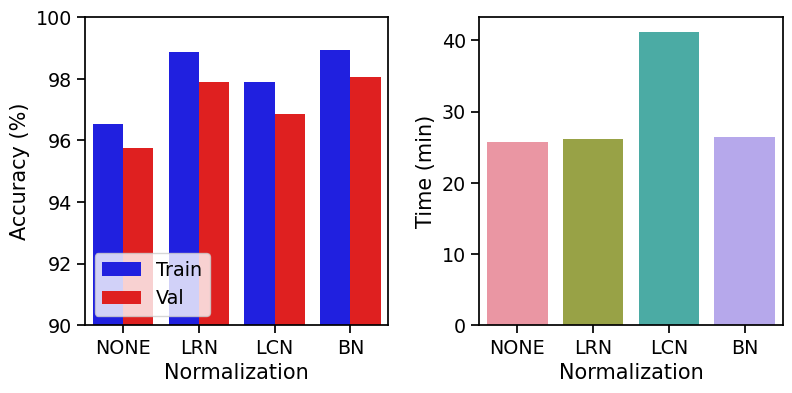

In [2]:
# Data from Running Notebooks
df = pd.read_csv('zfnet_results/norm.csv')

# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
sns.barplot(x='Normalization', y='Accuracy (%)', hue='Types', data=df, ax=ax[0])
sns.barplot(x='Normalization', y='Time (min)', data=df, ax=ax[1])
fig.subplots_adjust(wspace=0.3)
ax[0].legend(loc='lower left')

ax[0].set_ylim(90, 100)

## Comparison of Dropout Fraction
- Last 2 layers in the network use `nn.dropout`
    + Sets some fraction of the neurons in the layer to 0 for regularization to protect against overfitting
- In general, dropout seems to improve performance of models both in terms of training accuracy and validation accuracy
    + When dropout fraction is too high (e.g. 0.875), we get worse performance
    + Any fraction between 0.125 to 0.75 seems to give improved results

(90.0, 100.0)

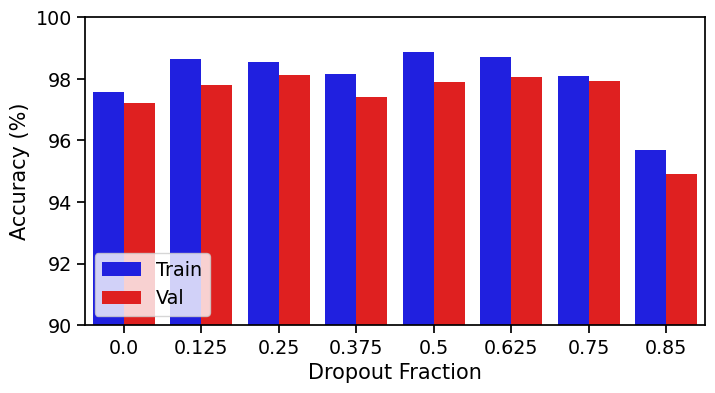

In [3]:
# Create a dataframe
df = pd.read_csv('zfnet_results/dropout.csv')

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x='Dropout Fraction', y='Accuracy (%)', hue='Types', data=df, ax=ax)
ax.legend(loc='lower left')
#sns.barplot(x='Dropout Fraction', y='Time (s)', data=df, ax=ax[1])

ax.set_ylim(90, 100)

## Compare Best Training and Testing Accuracy
- Number of Epochs to stop training was determined by the point where the validation acuracy stops increasing

In [4]:
df = pd.read_csv('results/best_models.csv')
df['Train'] = df['Train %']
df['Val'] = df['Test %']
df.drop(columns=['Train %', 'Test %'], inplace=True)
df.head()

,Method,Epochs,Train,Val
0,Base,35,94.00,91.00
1,Chn-Bst,33,97.00,93.00
2,Res-20,27,99.00,93.00
3,Res-40,40,99.00,93.00
4,AlexNet,30,95.13,94.97


(80.0, 100.0)

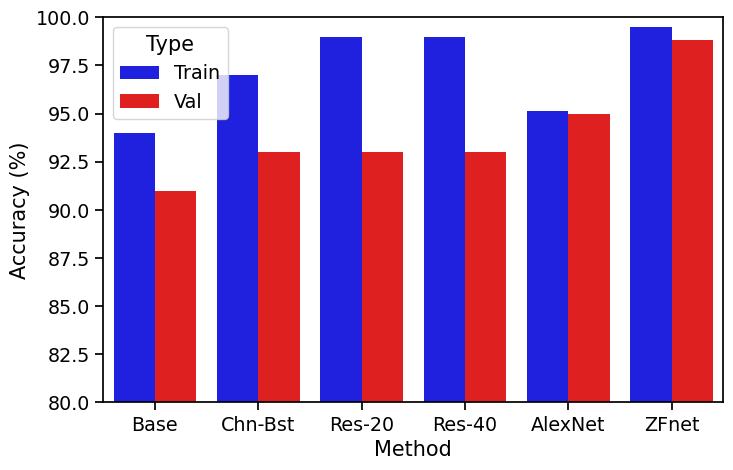

In [6]:
df_melt = df.melt(id_vars='Method', value_vars = ['Train', 'Val'], var_name='Type', value_name='Accuracy (%)')
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Method', y='Accuracy (%)', hue='Type', data=df_melt, ax=ax)
ax.set_ylim(80, 100)

# Compare Training Time of Models
- 40 Block ResNet took much longer to train
    + Also, much more volatile and doesn't fully converge
- Other Models are similar

In [7]:
df1 = pd.read_csv('results/BaseCNN_results.csv')
df2 = pd.read_csv('results/ChanlBst_results.csv')
df3 = pd.read_csv('results/DeepRsnt_20_results.csv')
df4 = pd.read_csv('results/DeepRsnt_40_results.csv')
df5 = pd.read_csv('results/Alexnet_results.csv')
df6 = pd.read_csv('results/ZFNet_results.csv')

(0.0, 80.0)

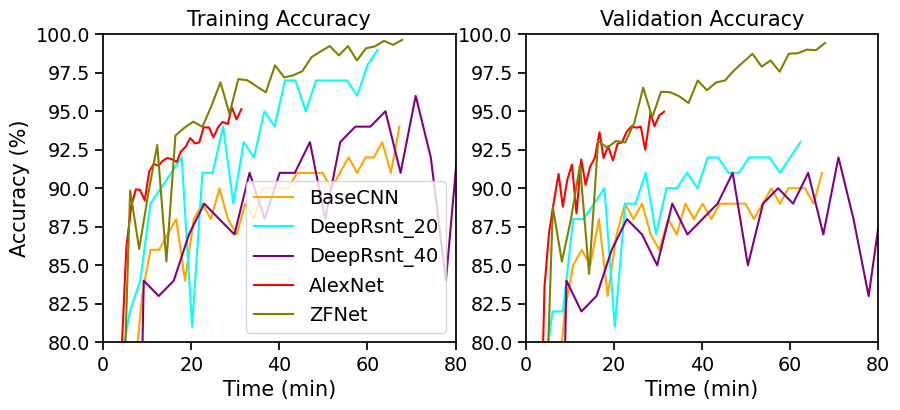

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
end_pts = [35, 33, 27, 40, 30, 33] # Epoch number where training stopped or validation accuracy plateaued
ax[0].plot(df1['Time'][0:end_pts[0]]/60, df1['Train_Accuracy'][0:end_pts[0]]*100, label='BaseCNN', color='orange')
#ax[0].plot(df2['Time'][0:end_pts[1]]/60, df2['Train_Accuracy'][0:end_pts[1]]*100, label='ChanlBst', color='red')
ax[0].plot(df3['Time'][0:end_pts[2]]/60, df3['Train_Accuracy'][0:end_pts[2]]*100, label='DeepRsnt_20', color='cyan')
ax[0].plot(df4['Time'][0:end_pts[3]]/60, df4['Train_Accuracy'][0:end_pts[3]]*100, label='DeepRsnt_40', color='purple')
ax[0].plot(df5['Time'][0:end_pts[4]]/60, df5['Train_Accuracy'][0:end_pts[4]], label='AlexNet', color='red')
ax[0].plot(df6['Time'][0:end_pts[5]]/60, df6['Train_Accuracy'][0:end_pts[5]]*100, label='ZFNet', color='olive')
ax[1].plot(df1['Time'][0:end_pts[0]]/60, df1['Val_Accuracy'][0:end_pts[0]]*100, label='BaseCNN', color='orange')
#ax[1].plot(df2['Time'][0:end_pts[1]]/60, df2['Val_Accuracy'][0:end_pts[1]]*100, label='ChanlBst', color='red')
ax[1].plot(df3['Time'][0:end_pts[2]]/60, df3['Val_Accuracy'][0:end_pts[2]]*100, label='DeepRsnt_20', color='cyan')
ax[1].plot(df4['Time'][0:end_pts[3]]/60, df4['Val_Accuracy'][0:end_pts[3]]*100, label='DeepRsnt_40', color='purple')
ax[1].plot(df5['Time'][0:end_pts[4]]/60, df5['Val_Accuracy'][0:end_pts[4]], label='AlexNet', color='red')
ax[1].plot(df6['Time'][0:end_pts[5]]/60, df6['Val_Accuracy'][0:end_pts[5]]*100, label='ZFNet', color='olive')
ax[0].legend(loc='lower right', fontsize=14)
ax[0].set_title('Training Accuracy')
ax[1].set_title('Validation Accuracy')
ax[0].set_xlabel('Time (min)')
ax[1].set_xlabel('Time (min)')
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_ylim(80, 100)
ax[1].set_ylim(80, 100)
ax[0].set_xlim(0, 80)
ax[1].set_xlim(0, 80)